In [134]:
import pandas as pd

In [135]:
cols = ['sepal_length(cm)', 'sepal_weidth(cm)', "petal_length(cm)", "petal_weidth(cm)", 'class']
df = pd.read_csv("iris.data", header=None,names =cols)

In [136]:
print(df.head())

   sepal_length(cm)  sepal_weidth(cm)  petal_length(cm)  petal_weidth(cm)  \
0               5.1               3.5               1.4               0.2   
1               4.9               3.0               1.4               0.2   
2               4.7               3.2               1.3               0.2   
3               4.6               3.1               1.5               0.2   
4               5.0               3.6               1.4               0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


In [137]:
df.tail()

,sepal_length(cm),sepal_weidth(cm),petal_length(cm),petal_weidth(cm),class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal_length(cm)  150 non-null    float64
 1   sepal_weidth(cm)  150 non-null    float64
 2   petal_length(cm)  150 non-null    float64
 3   petal_weidth(cm)  150 non-null    float64
 4   class             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [139]:
df.isna().sum()

sepal_length(cm)    0
sepal_weidth(cm)    0
petal_length(cm)    0
petal_weidth(cm)    0
class               0
dtype: int64

In [140]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [141]:
df.describe()

,sepal_length(cm),sepal_weidth(cm),petal_length(cm),petal_weidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [142]:
df.groupby('class').describe()

sepal_length(cm)                                              \
                           count   mean       std  min    25%  50%  75%  max   
class                                                                          
Iris-setosa                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor             50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_weidth(cm)         ... petal_length(cm)       \
                           count   mean  ...              75%  max   
class                                    ...                         
Iris-setosa                 50.0  3.418  ...            1.575  1.9   
Iris-versicolor             50.0  2.770  ...            4.600  5.1   
Iris-virginica              50.0  2.974  ...            5.875  6.9   

                petal_weidth(cm)                                            
                           count   mean       std  min  25%  50%  75%  max  
class                                                                       
Iris-setosa                 50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [143]:
df.shape

(150, 5)

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

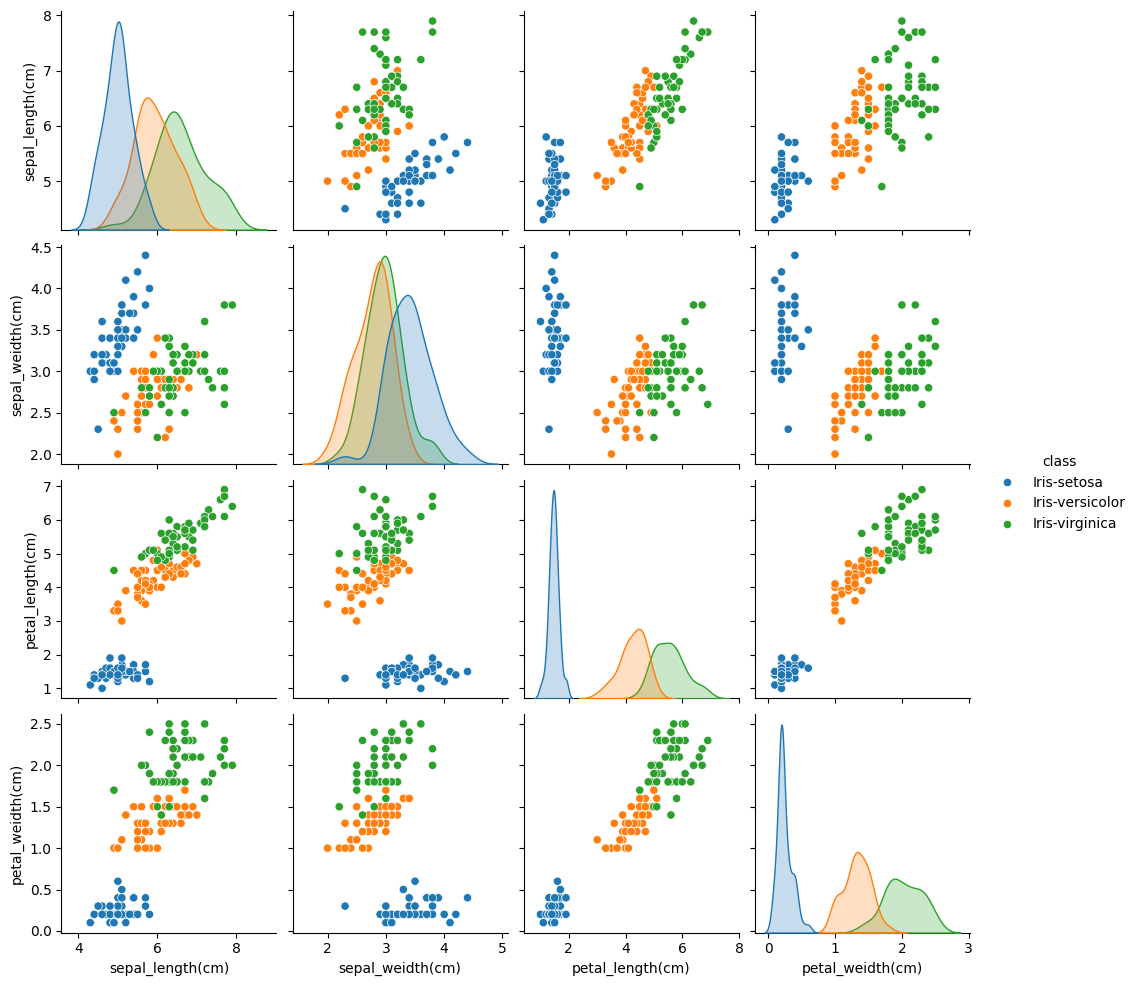

In [145]:
sns.pairplot(data = df, hue='class')
plt.show()

In [146]:
df.columns

Index(['sepal_length(cm)', 'sepal_weidth(cm)', 'petal_length(cm)',
       'petal_weidth(cm)', 'class'],
      dtype='object')

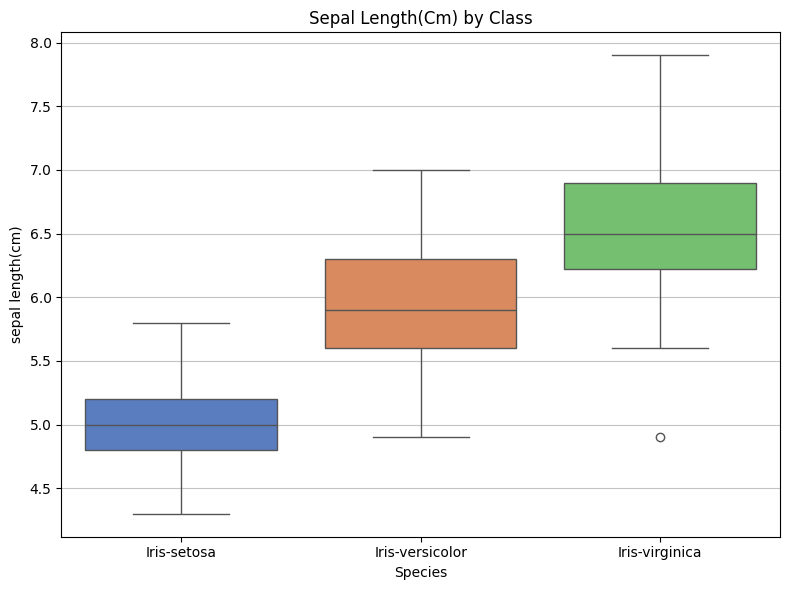

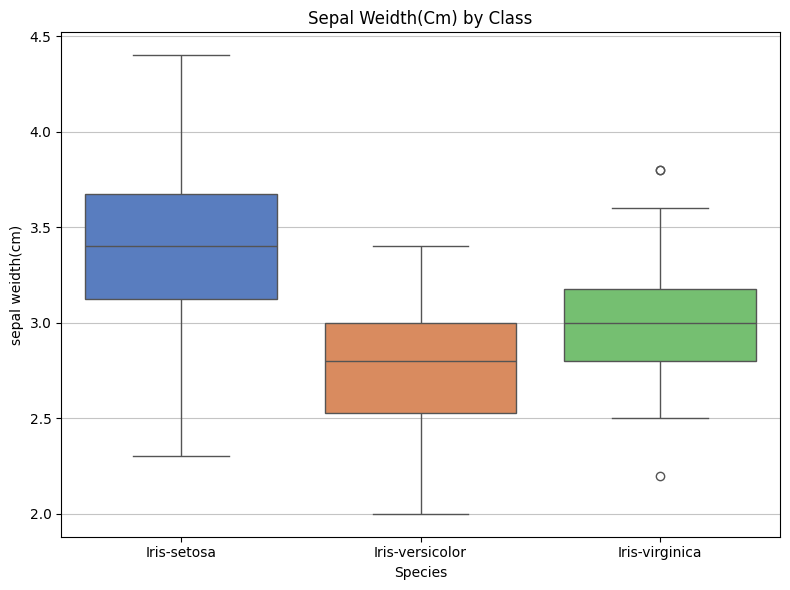

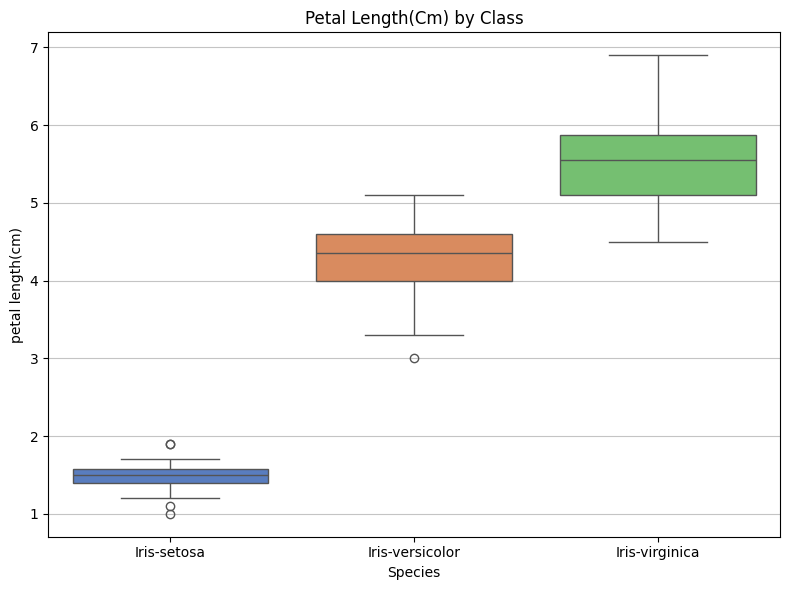

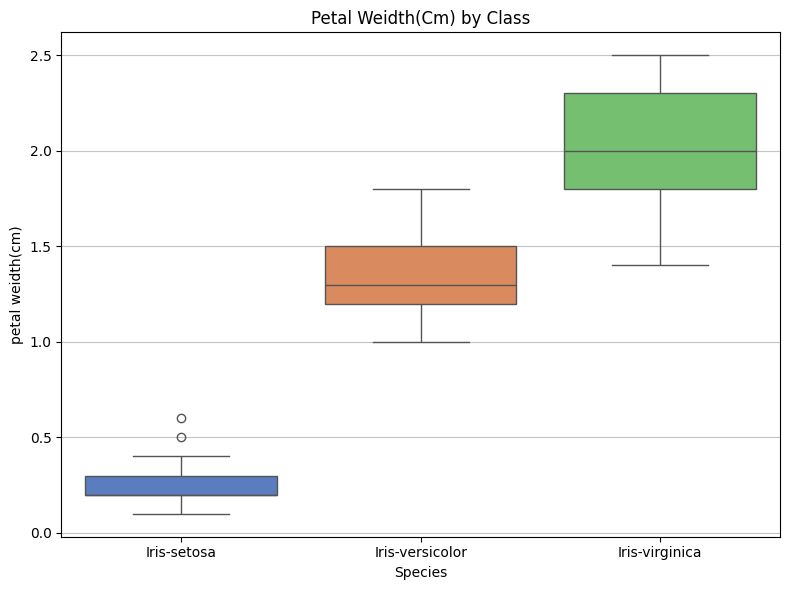

In [147]:
feature_cols = ['sepal_length(cm)', 'sepal_weidth(cm)','petal_length(cm)','petal_weidth(cm)']
for feature in feature_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(data =df, x = "class", y = feature,hue="class",legend=False, palette="muted")
    plt.title(f"{feature.replace('_',' ').title()} by Class")
    plt.xlabel("Species")
    plt.ylabel(feature.replace("_"," "))
    plt.tight_layout()
    plt.grid(axis="y", alpha = 0.75)
    plt.show()

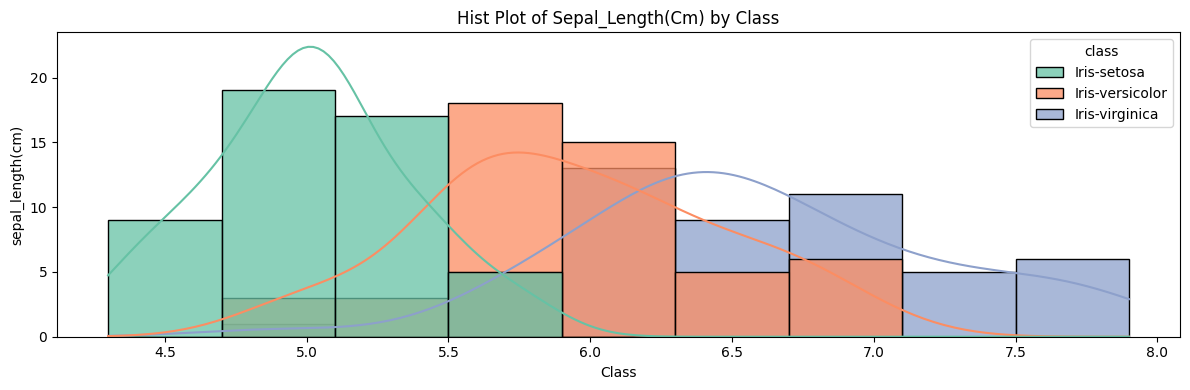

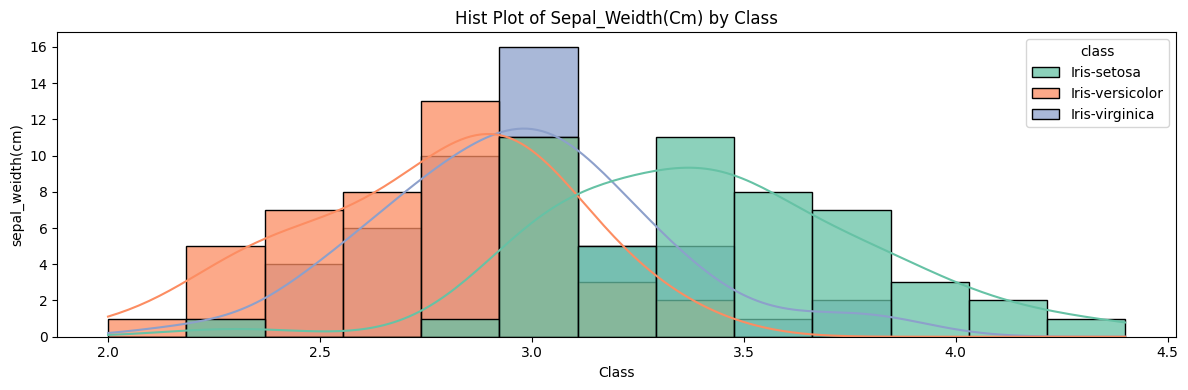

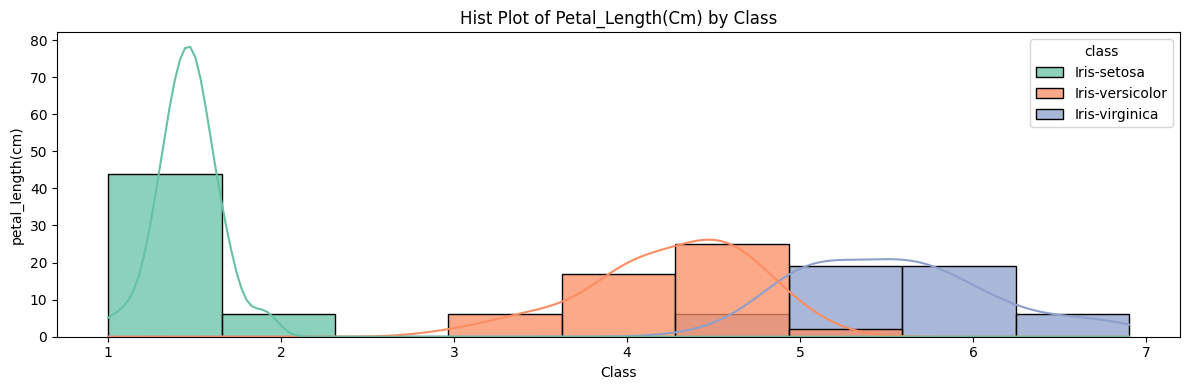

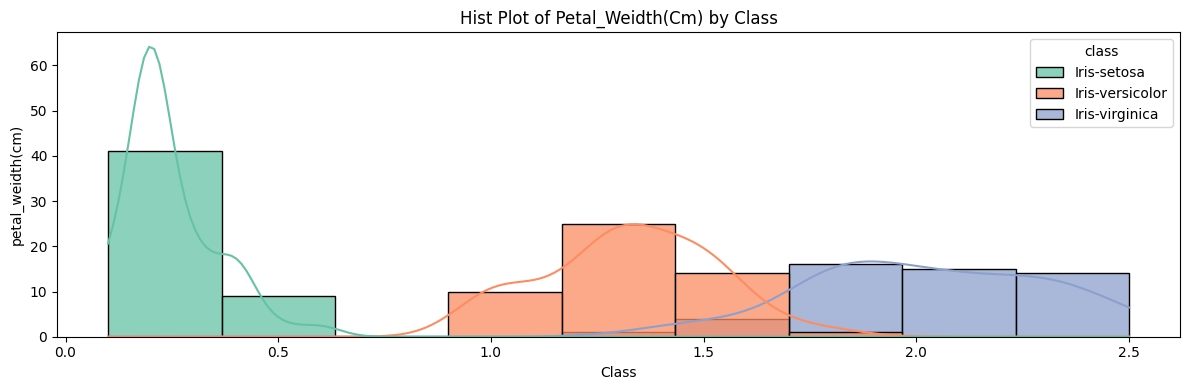

In [148]:
for feature in feature_cols:
    plt.figure(figsize=(12,4))
    sns.histplot(data=df, x=feature, hue='class', palette='Set2', kde=True, alpha=0.75)
    plt.title(f"Hist Plot of {feature.title()} by Class")
    plt.xlabel("Class")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

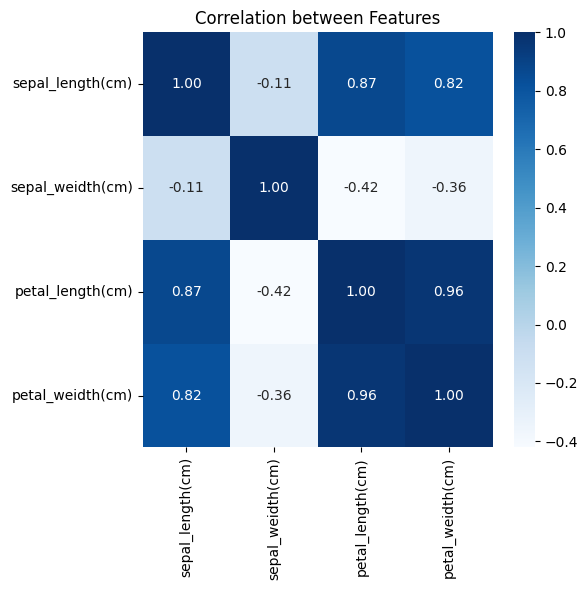

In [149]:
plt.figure(figsize=(6,6))
sns.heatmap(df[feature_cols].corr(), annot=True, fmt='.2f',  cmap = 'Blues')
plt.title("Correlation between Features")
plt.tight_layout()
plt.show()

In [150]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [151]:
# Train test 
X = df.drop('class', axis=1)
y = df['class']

le = LabelEncoder()
y = le.fit_transform(y)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7, random_state=42)

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [153]:
models = {
    "Logestic Regression" : LogisticRegression(),
    "K-Neighbours" : KNeighborsClassifier(),
    "Decision Trees" : DecisionTreeClassifier(),
    "SVC": SVC()
}

for name, model in models.items():
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    print(f"{name}: {score}")


Logestic Regression: 0.9619047619047619
K-Neighbours: 0.9714285714285714
Decision Trees: 0.9238095238095239
SVC: 0.9619047619047619


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.97      0.94      0.95        33
 Iris-virginica       0.94      0.97      0.95        32

       accuracy                           0.97       105
      macro avg       0.97      0.97      0.97       105
   weighted avg       0.97      0.97      0.97       105



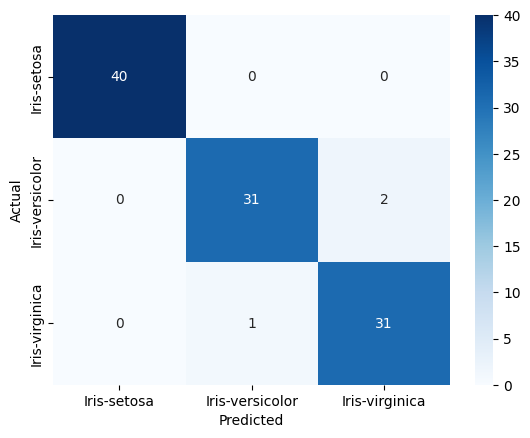

In [154]:
from sklearn.metrics import confusion_matrix, classification_report

best_model = KNeighborsClassifier()  
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()